In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
#Load the datasets
df1 = "Resources/smmh.csv"
df2 = "Resources/mental_health_and_technology_usage_2024.csv"


table1_df = pd.read_csv(df1)
table2_df = pd.read_csv(df2)

In [13]:
# Display basic info for SMMH dataset
table1_df.head()


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [15]:
# Display basic info for Mental Health and Social Media dataset

table2_df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [5]:
#Check for missing values
print(table1_df.isnull().sum())
print(table2_df.isnull().sum())

#Drop missing values 


Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

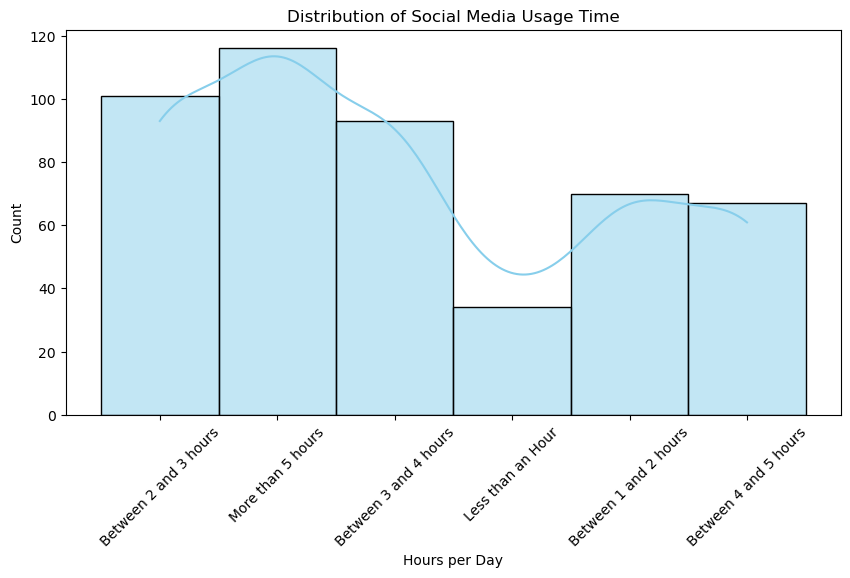

In [17]:
# Distribution of Social Media Usage Time
plt.figure(figsize=(10, 5))
sns.histplot(table1_df['8. What is the average time you spend on social media every day?'], kde=True, color="skyblue")
plt.title("Distribution of Social Media Usage Time")
plt.xlabel("Hours per Day")



# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()




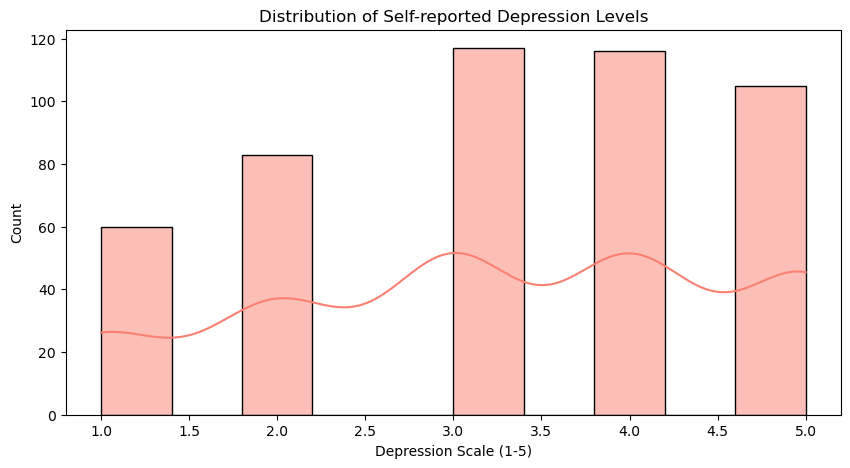

In [21]:
# Distribution of Depression Levels
plt.figure(figsize=(10, 5))
sns.histplot(table1_df['18. How often do you feel depressed or down?'], kde=True, color="salmon")
plt.title("Distribution of Self-reported Depression Levels")
plt.xlabel("Depression Scale (1-5)")
plt.show()

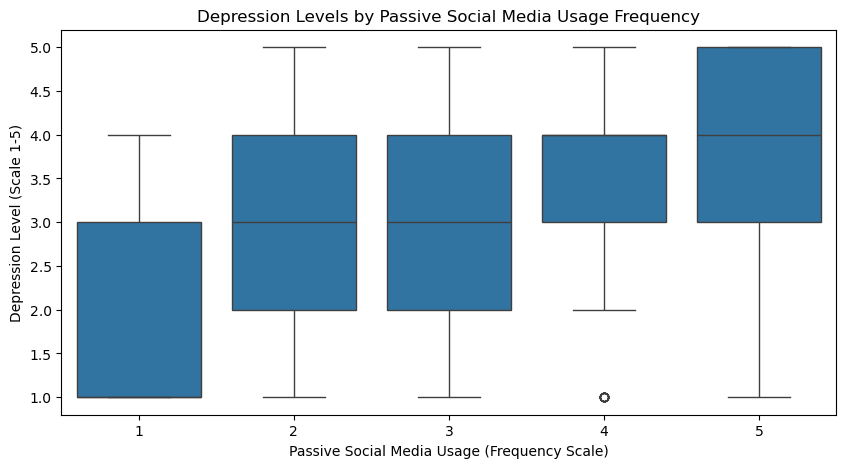

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=table1_df['9. How often do you find yourself using Social media without a specific purpose?'], 
            y=table1_df['18. How often do you feel depressed or down?'])
plt.title("Depression Levels by Passive Social Media Usage Frequency")
plt.xlabel("Passive Social Media Usage (Frequency Scale)")
plt.ylabel("Depression Level (Scale 1-5)")
plt.show()


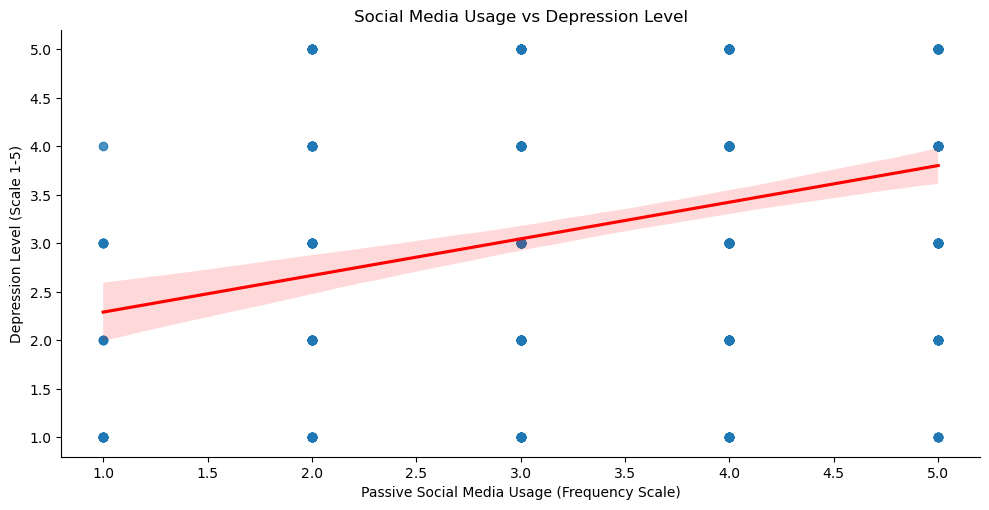

In [25]:
sns.lmplot(x="9. How often do you find yourself using Social media without a specific purpose?", 
           y="18. How often do you feel depressed or down?", 
           data=table1_df, aspect=2, line_kws={'color': 'red'})
plt.title("Social Media Usage vs Depression Level")
plt.xlabel("Passive Social Media Usage (Frequency Scale)")
plt.ylabel("Depression Level (Scale 1-5)")
plt.show()


<Figure size 1000x600 with 0 Axes>

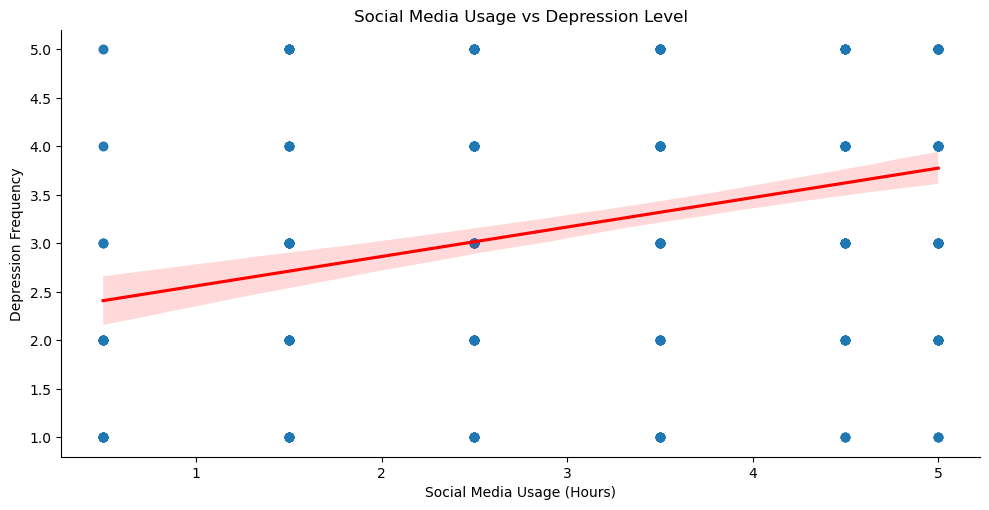

In [41]:
# Step 1: Define a mapping dictionary
time_mapping = {
    "Less than an Hour": 0.5,
    "Between 1 and 2 hours": 1.5,
    "Between 2 and 3 hours": 2.5,
    "Between 3 and 4 hours": 3.5,
    "Between 4 and 5 hours": 4.5,
    "More than 5 hours": 5
}

# Step 2: Apply the mapping to the DataFrame
table1_df["8. What is the average time you spend on social media every day?"] = \
    table1_df["8. What is the average time you spend on social media every day?"].replace(time_mapping)

# Step 3: Ensure the target column is numeric, dropping rows with non-numeric values if necessary
table1_df = table1_df.dropna(subset=["8. What is the average time you spend on social media every day?", 
                                     "18. How often do you feel depressed or down?"])

# Plot regression line

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.lmplot(
    x="8. What is the average time you spend on social media every day?", 
    y="18. How often do you feel depressed or down?", 
    data=table1_df, 
    aspect=2, 
    line_kws={'color': 'red'}
)
plt.title("Social Media Usage vs Depression Level")
plt.xlabel("Social Media Usage (Hours)")
plt.ylabel("Depression Frequency")
plt.show()


/var/folders/m4/xxjsvx1d79xchc0xvmp74hcc0000gn/T/ipykernel_85044/2624154917.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = table1_df.groupby(['Passive Scrolling Bin', 'Total Social Media Bin'])['18. How often do you feel depressed or down?'].mean().unstack()


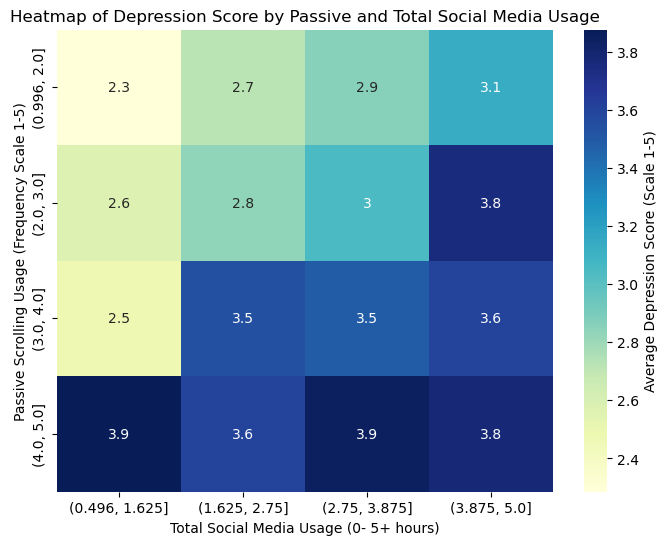

In [63]:
# Bin passive scrolling and total social media time
table1_df['Passive Scrolling Bin'] = pd.cut(table1_df['9. How often do you find yourself using Social media without a specific purpose?'], bins=4)
table1_df['Total Social Media Bin'] = pd.cut(table1_df['8. What is the average time you spend on social media every day?'], bins=4)

# Calculate mean depression score for each bin pair
heatmap_data = table1_df.groupby(['Passive Scrolling Bin', 'Total Social Media Bin'])['18. How often do you feel depressed or down?'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Depression Score (Scale 1-5)'})
plt.title("Heatmap of Depression Score by Passive and Total Social Media Usage")
plt.xlabel("Total Social Media Usage (0- 5+ hours)")
plt.ylabel("Passive Scrolling Usage (Frequency Scale 1-5)")
plt.show()

